In [1]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)
LEVEL = 'level_1'


In [2]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    best_w = 0
    best_b = 0
    best_acc =0
    # initialise w, b
    if initialise:
      self.w = np.zeros((1, X.shape[1]))
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
         
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
      #print("dw",dw)
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        #print(Y_pred)
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
      Y_pred =(Y_pred>= 0.5).astype(int)
      accuracy = accuracy_score(Y_pred,Y.reshape(-1,1))
      if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
    self.w   = best_w
    self.b   = best_b
    if display_loss:
      print(loss.values())
      print("w,b",self.w,self.b)
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [3]:
class SigmoidNeuron1:
    def __init__(self):
        self.w = None
        self.b = None  
    def sigmoid(self,X):
        return 1/(1+np.exp(-X))
    def forward_prop(self,X):
        #print("forwar_prop",X.shape,self.w.shape,self.b,self.sigmoid(np.dot (X,self.w) + self.b).shape)
        return self.sigmoid(np.dot (X,self.w) + self.b)
    def backward_prop(self,X,Y):
        m = X.shape[0]
        #print(self.forward_prop(X).shape,Y.reshape(-1,1).shape)
        dz = self.forward_prop(X) -Y.reshape(-1,1) 
        #print("dz X",dz.shape,X.shape,type(dz))
        db = np.sum(dz)
        dw = np.dot(X.T,dz)
        #print("dw db",dw.shape,db)
        return dw,db
    def loss(self,y,y_predict):
        m=y.shape[0]
        y=y.reshape(-1,1)
        print(y.shape)
        #print(y_predict)
        for i,j,k in zip(y,y_predict,(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))):
            print(i,j,k)
            print(i*np.log(j))
            print(1-i,np.log(1-j),(1-i)*np.log(1-j))
        print((y*np.log(y_predict)+(1-y)*np.log(1-y_predict)))
        return -1/m*np.sum(y*np.log(y_predict)+(1-y)*np.log(1-y_predict))
    def update(self,dw,db,learning_rate):
        self.w  = self.w -learning_rate* dw
        self.b  = self.b -learning_rate* db 
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse",display_loss=False):
        loss_list =[]
        if(initialise):
            self.w = np.zeros((X.shape[1],1))
            self.b = 0
            dw     = 0
            db     = 0
            best_w = 0
            best_b = 0
            best_acc =0
        for iter1 in range(epochs):
                y_predict = self.forward_prop(X)
                #print(y_predict)
                
                dw,db = self.backward_prop(X,Y)
                self.update(dw,db,learning_rate)
                y_predict = self.forward_prop(X)
                loss_list.append(log_loss(Y,y_predict))
                y_predict =(y_predict>= 0.5).astype(int)
                accuracy = accuracy_score(y_predict,Y.reshape(-1,1))
                if(accuracy>=best_acc):
                    best_acc = accuracy
                    best_w   = self.w
                    best_b   = self.b
        self.w   = best_w
        self.b   = best_b
                #print(y_predict)
        if display_loss:
            print(loss_list)
            print("w,b",self.w,self.b)
            plt.plot(loss_list)
            plt.xlabel('Epochs')
            plt.ylabel('Log Loss')
            plt.show()
    def predict(self,X):
        return self.forward_prop(X)         

In [4]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    print (files)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [5]:
LEVEL = 'level_2'
languages = ['ta', 'hi', 'en']

images_train = read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+"background", key_prefix='bgr_') # change the path
for language in languages:
   images_train.update(read_all("../input/"+ LEVEL+ "_train/" +LEVEL+"/"+language, key_prefix=language+"_" ))
print(len(images_train))

images_test = read_all("../input/"+ LEVEL+ "_test/" +"kaggle_"+LEVEL, key_prefix='')

Reading:
['145.jpg', '19_d2.jpg', '44_d3.jpg', '15_d2.jpg', '46_d2.jpg', '34.jpg', '51_d2.jpg', '90.jpg', '100_d3.jpg', '106_d2.jpg', '97_d2.jpg', '58_d2.jpg', '48.jpg', '62_d3.jpg', '123.jpg', '106.jpg', '21_d2.jpg', '48_d3.jpg', '138.jpg', '78_d3.jpg', '91_d3.jpg', '98_d2.jpg', '141.jpg', '69.jpg', '109_d2.jpg', '60_d2.jpg', '113_d2.jpg', '86_d2.jpg', '122.jpg', '16_d2.jpg', '140.jpg', '115_d2.jpg', '100_d2.jpg', '117.jpg', '49_d3.jpg', '17.jpg', '96_d3.jpg', '90_d2.jpg', '25_d3.jpg', '135_d3.jpg', '72.jpg', '142_d3.jpg', '119.jpg', '7_d3.jpg', '131_d3.jpg', '12_d2.jpg', '101_d3.jpg', '143.jpg', '93_d3.jpg', '116_d2.jpg', '10.jpg', '44_d2.jpg', '137_d3.jpg', '83_d2.jpg', '111_d3.jpg', '74.jpg', '21.jpg', '134.jpg', '112.jpg', '4.jpg', '84_d3.jpg', '146_d2.jpg', '88_d2.jpg', '36_d3.jpg', '44.jpg', '26_d2.jpg', '45_d2.jpg', '146_d3.jpg', '97.jpg', '136.jpg', '149.jpg', '54_d3.jpg', '56_d3.jpg', '116.jpg', '58.jpg', '2_d3.jpg', '67.jpg', '69_d2.jpg', '147.jpg', '110_d2.jpg', '84.jpg', '


Reading:
['c94_142.jpg', 'c51_62.jpg', 'c46_108.jpg', 'c70_28.jpg', 'c76_86.jpg', 'c30_127.jpg', 'c34_37.jpg', 'c54_18.jpg', 'c57_117.jpg', 'c15_91.jpg', 'c89_130.jpg', 'c19_19.jpg', 'c93_48.jpg', 'c82_7.jpg', 'c65_143.jpg', 'c8_40.jpg', 'c46_110.jpg', 'c17_21.jpg', 'c23_79.jpg', 'c7_72.jpg', 'c14_68.jpg', 'c66_103.jpg', 'c35_112.jpg', 'c8_92.jpg', 'c82_22.jpg', 'c13_2.jpg', 'c56_100.jpg', 'c82_98.jpg', 'c32_132.jpg', 'c72_137.jpg', 'c51_49.jpg', 'c82_82.jpg', 'c85_51.jpg', 'c92_26.jpg', 'c25_58.jpg', 'c22_125.jpg', 'c8_111.jpg', 'c31_16.jpg', 'c2_69.jpg', 'c5_30.jpg', 'c62_84.jpg', 'c59_38.jpg', 'c77_102.jpg', 'c83_33.jpg', 'c44_59.jpg', 'c54_75.jpg', 'c57_118.jpg', 'c63_34.jpg', 'c29_6.jpg', 'c38_45.jpg', 'c67_78.jpg', 'c69_87.jpg', 'c66_109.jpg', 'c33_104.jpg', 'c13_60.jpg', 'c1_81.jpg', 'c36_64.jpg', 'c72_73.jpg', 'c45_20.jpg', 'c39_134.jpg', 'c0_43.jpg', 'c51_23.jpg', 'c84_85.jpg', 'c4_77.jpg', 'c50_139.jpg', 'c73_8.jpg', 'c88_76.jpg', 'c78_136.jpg', 'c84_95.jpg', 'c87_12.jpg', '


Reading:
['c10_80.jpg', 'c2_89.jpg', 'c11_95.jpg', 'c8_144.jpg', 'c11_114.jpg', 'c1_122.jpg', 'c0_65.jpg', 'c7_75.jpg', 'c9_22.jpg', 'c8_18.jpg', 'c1_23.jpg', 'c6_117.jpg', 'c11_49.jpg', 'c3_62.jpg', 'c3_20.jpg', 'c6_41.jpg', 'c3_124.jpg', 'c5_51.jpg', 'c10_133.jpg', 'c0_84.jpg', 'c7_130.jpg', 'c3_109.jpg', 'c11_2.jpg', 'c10_90.jpg', 'c9_40.jpg', 'c5_3.jpg', 'c9_106.jpg', 'c8_92.jpg', 'c11_146.jpg', 'c5_108.jpg', 'c7_1.jpg', 'c2_138.jpg', 'c5_4.jpg', 'c4_44.jpg', 'c3_86.jpg', 'c1_35.jpg', 'c10_139.jpg', 'c7_71.jpg', 'c0_12.jpg', 'c7_38.jpg', 'c1_102.jpg', 'c8_8.jpg', 'c2_142.jpg', 'c9_112.jpg', 'c5_29.jpg', 'c1_148.jpg', 'c7_147.jpg', 'c3_19.jpg', 'c8_115.jpg', 'c6_100.jpg', 'c10_99.jpg', 'c2_67.jpg', 'c4_120.jpg', 'c9_57.jpg', 'c4_16.jpg', 'c10_63.jpg', 'c6_143.jpg', 'c4_125.jpg', 'c2_94.jpg', 'c7_17.jpg', 'c8_135.jpg', 'c9_32.jpg', 'c0_66.jpg', 'c7_113.jpg', 'c8_58.jpg', 'c5_140.jpg', 'c8_64.jpg', 'c7_73.jpg', 'c5_45.jpg', 'c6_82.jpg', 'c8_104.jpg', 'c8_28.jpg', 'c8_24.jpg', 'c2_98.


Reading:
['c47_100.jpg', 'c26_102.jpg', 'c16_132.jpg', 'c34_144.jpg', 'c16_6.jpg', 'c11_95.jpg', 'c10_41.jpg', 'c5_73.jpg', 'c43_126.jpg', 'c44_105.jpg', 'c46_68.jpg', 'c38_54.jpg', 'c35_77.jpg', 'c42_32.jpg', 'c8_26.jpg', 'c3_20.jpg', 'c10_30.jpg', 'c41_21.jpg', 'c46_82.jpg', 'c25_104.jpg', 'c21_96.jpg', 'c30_13.jpg', 'c39_138.jpg', 'c43_110.jpg', 'c15_123.jpg', 'c43_29.jpg', 'c37_2.jpg', 'c40_70.jpg', 'c33_117.jpg', 'c11_108.jpg', 'c32_53.jpg', 'c26_24.jpg', 'c51_35.jpg', 'c6_59.jpg', 'c50_141.jpg', 'c43_62.jpg', 'c38_34.jpg', 'c39_14.jpg', 'c10_139.jpg', 'c1_51.jpg', 'c28_125.jpg', 'c18_145.jpg', 'c1_94.jpg', 'c25_40.jpg', 'c39_72.jpg', 'c9_112.jpg', 'c7_48.jpg', 'c18_33.jpg', 'c41_1.jpg', 'c22_120.jpg', 'c30_28.jpg', 'c14_148.jpg', 'c47_87.jpg', 'c37_10.jpg', 'c22_128.jpg', 'c12_133.jpg', 'c27_69.jpg', 'c25_45.jpg', 'c25_31.jpg', 'c32_127.jpg', 'c45_146.jpg', 'c45_43.jpg', 'c9_39.jpg', 'c19_135.jpg', 'c40_131.jpg', 'c32_137.jpg', 'c38_58.jpg', 'c20_109.jpg', 'c5_90.jpg', 'c22_15.j


900
Reading:
['145.jpg', '34.jpg', '90.jpg', '261.jpg', '48.jpg', '289.jpg', '155.jpg', '123.jpg', '106.jpg', '158.jpg', '195.jpg', '274.jpg', '138.jpg', '162.jpg', '281.jpg', '141.jpg', '69.jpg', '273.jpg', '122.jpg', '140.jpg', '268.jpg', '117.jpg', '17.jpg', '256.jpg', '231.jpg', '251.jpg', '72.jpg', '119.jpg', '152.jpg', '287.jpg', '269.jpg', '143.jpg', '296.jpg', '248.jpg', '277.jpg', '176.jpg', '10.jpg', '161.jpg', '201.jpg', '74.jpg', '21.jpg', '134.jpg', '112.jpg', '4.jpg', '272.jpg', '44.jpg', '97.jpg', '136.jpg', '149.jpg', '181.jpg', '295.jpg', '116.jpg', '279.jpg', '194.jpg', '58.jpg', '67.jpg', '174.jpg', '147.jpg', '84.jpg', '198.jpg', '270.jpg', '114.jpg', '85.jpg', '92.jpg', '220.jpg', '47.jpg', '219.jpg', '207.jpg', '64.jpg', '159.jpg', '129.jpg', '9.jpg', '61.jpg', '51.jpg', '73.jpg', '260.jpg', '28.jpg', '11.jpg', '288.jpg', '36.jpg', '111.jpg', '218.jpg', '212.jpg', '118.jpg', '240.jpg', '224.jpg', '53.jpg', '236.jpg', '13.jpg', '46.jpg', '7.jpg', '227.jpg', '93.jp

In [6]:
list(images_test.keys())[:5]

['145', '34', '90', '261', '48']

In [7]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
  ID_test.append(int(key))
  X_test.append(value)
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(900, 256) (900,)
(300, 256)


In [8]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[1.6322579953922838, 1.209076126601035, 0.9681531556144097, 0.6900632793926832, 0.49725217131037314, 0.43378692304801864, 0.3839593712603681, 0.34426104832322596, 0.29464410731694013, 0.2308502063687225, 0.17905434900259867, 0.15051177151722267, 0.12926711273608105, 0.1112776447732095, 0.10071105647165673, 0.09161254379015255, 0.08477411847961032, 0.07871990809545255, 0.07714155010241461, 0.07699608949251062, 0.07695006859649665, 0.0761760263835373, 0.06998823522327847, 0.06380421286222804, 0.057617965665028505, 0.051427707029934905, 0.04523724062950755, 0.03962300560320809, 0.038732950912378036, 0.03895629752580244, 0.03900019593921557, 0.03900188189338921, 0.03902176243311241, 0.039050092191556335, 0.0390868042378782, 0.03912114421122984, 0.03914387845010895, 0.03915522852965817, 0.039160619737371644, 0.03916382308505512, 0.039166657161173124, 0.03651370421340352, 0.029334096672109282, 0.022171261617583617, 0.015036425842385312, 0.007943239400194061, 0.0016701721885903536, 0.00058149

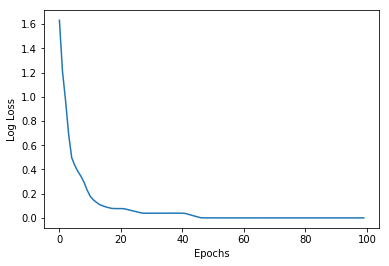

In [9]:
sn_mse = SigmoidNeuron1()
sn_mse.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="mse", display_loss=True)


dict_values([1.6322579953922813, 1.2090761266010337, 0.9681531556144104, 0.6900632793926831, 0.49725217131037336, 0.4337869230480189, 0.3839593712603683, 0.34426104832322635, 0.2946441073169404, 0.23085020636872286, 0.17905434900259895, 0.15051177151722334, 0.12926711273608157, 0.11127764477321, 0.10071105647165714, 0.09161254379015288, 0.08477411847961058, 0.07871990809545278, 0.07714155010241464, 0.07699608949251065, 0.07695006859649667, 0.07617602638353758, 0.06998823522327875, 0.06380421286222829, 0.05761796566502883, 0.05142770702993518, 0.04523724062950784, 0.03962300560320823, 0.038732950912378016, 0.03895629752580241, 0.03900019593921559, 0.039001881893389205, 0.0390217624331124, 0.03905009219155634, 0.03908680423787823, 0.039121144211229836, 0.039143878450108985, 0.03915522852965815, 0.03916061973737167, 0.03916382308505511, 0.03916665716117312, 0.03651370421340349, 0.029334096672109223, 0.022171261617583555, 0.015036425842385265, 0.007943239400193971, 0.0016701721885903115, 

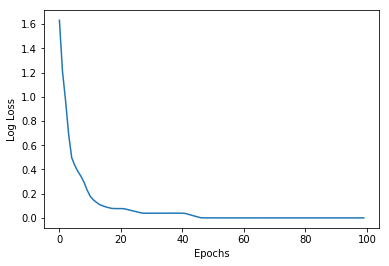

In [10]:
sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="ce", display_loss=True)

In [11]:

#sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="ce", display_loss=True)

from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=8,shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(X_scaled_train) # returns the number of splitting iterations in the cross-validator
#print(kf) 


def cross_validation(learning_rate,epochs):
    acc =[]
    for train_index, test_index in kf.split(X_scaled_train):
        #print(train_index,test_index)
        sn_ce = SigmoidNeuron1()
        sn_ce.fit(X_scaled_train[train_index], Y_train[train_index], epochs=epochs, learning_rate=learning_rate, loss_fn="ce", display_loss=False)
        Y_pred_binarised_train = (sn_ce.predict(X_scaled_train[test_index])>= 0.5).astype("int").ravel()
        accuracy_test = accuracy_score(Y_pred_binarised_train, Y_train[test_index])
        acc.append(accuracy_test)
    #print(acc)
    accuracy =sum(acc)/len(acc)
    return accuracy



In [12]:
#epochs_list =[4000,6000,7000,9000]
#lr_rate_list =[0.0003,0.0008,0.0005,0.0001,0.0006]
#acc_dic ={}
#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

In [13]:
#Grid Search
#epochs_list =[40,100,1000,2000]
#lr_rate_list =[0.006,0.020,0.015,0.010,0.008]
#acc_dic ={}
#for epoch in epochs_list:
#    for lr_rate in lr_rate_list:
#        acc_dic[(epoch,lr_rate)] = cross_validation(lr_rate,epoch)

#print(acc_dic)

[0.20789599613300747, 0.14885919020547167, 0.10872660541531859, 0.0823438554939313, 0.06565756168551158, 0.054861615275084916, 0.047418763061662275, 0.04203619783025405, 0.0380524287655637, 0.035072870419297394, 0.0328164414034073, 0.031068810678048224, 0.029672884014060676, 0.02852048355845282, 0.027539924213134295, 0.026684150518384426, 0.025921951555766796, 0.025232179079960584, 0.02460011735761971, 0.024015230883917923, 0.023469759722100792, 0.0229578315948054, 0.0224748905834241, 0.02201732204515671, 0.02158220094776129, 0.021167119156543335, 0.020770064177246094, 0.02038933211358707, 0.020023463860484723, 0.01967119742140103, 0.019331431656085012, 0.019003198297459736, 0.018685640062868457, 0.018377993331200167, 0.018079574289292744, 0.017789767745861097, 0.017508018017037802, 0.01723382143451439, 0.01696672013427078, 0.01670629686320796, 0.01645217060065638, 0.016203992837072936, 0.01596144438694392, 0.015724232639581986, 0.015492089172035813, 0.015264767664132933, 0.01504204206

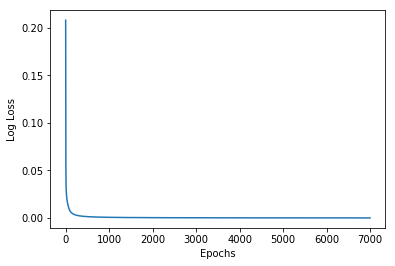

In [14]:
sn_ce = SigmoidNeuron1()
best_epoch   = 7000
best_lr_rate = 0.0005
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()



dict_values([0.2078959961330074, 0.14885919020547167, 0.10872660541531855, 0.08234385549393132, 0.06565756168551162, 0.05486161527508494, 0.047418763061662296, 0.04203619783025407, 0.03805242876556374, 0.035072870419297415, 0.032816441403407316, 0.031068810678048238, 0.029672884014060697, 0.028520483558452846, 0.027539924213134302, 0.026684150518384436, 0.025921951555766813, 0.025232179079960594, 0.024600117357619723, 0.024015230883917934, 0.023469759722100806, 0.022957831594805408, 0.022474890583424105, 0.02201732204515672, 0.021582200947761296, 0.02116711915654334, 0.020770064177246094, 0.02038933211358707, 0.02002346386048473, 0.019671197421401034, 0.019331431656085016, 0.01900319829745974, 0.018685640062868457, 0.018377993331200167, 0.018079574289292744, 0.0177897677458611, 0.017508018017037802, 0.017233821434514393, 0.016966720134270787, 0.016706296863207962, 0.016452170600656384, 0.01620399283707294, 0.015961444386943916, 0.015724232639581982, 0.015492089172035813, 0.01526476766

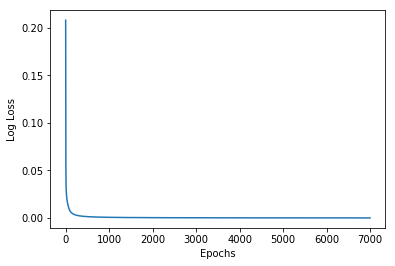

In [15]:

sn_ce = SigmoidNeuron()
best_epoch   = 7000
best_lr_rate = 0.0005
sn_ce.fit(X_scaled_train, Y_train, epochs=best_epoch, learning_rate=best_lr_rate, loss_fn="ce", display_loss=True)
Y_pred_binarised_train = (sn_ce.predict(X_scaled_train)>= 0.5).astype("int").ravel()

In [16]:
def print_accuracy(sn):
  Y_pred_train = sn.predict(X_scaled_train)
  Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
  accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
  print("Train Accuracy : ", accuracy_train)
  print("-"*50)

In [17]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  1.0
--------------------------------------------------
Train Accuracy :  1.0
--------------------------------------------------


## Sample Submission

In [18]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)

In [19]:
!pwd


/kaggle/working
